In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

In [2]:
df = pd.read_csv(r"D:\Analyst File\Data set\Telco communication churn\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
df["SeniorCitizen"] = df["SeniorCitizen"].replace(0,'no')
df["SeniorCitizen"] = df['SeniorCitizen'].replace(1,"yes")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.shape

(7043, 21)

In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.isnull().sum().sum()

0

# Amount and count of senior citizen 

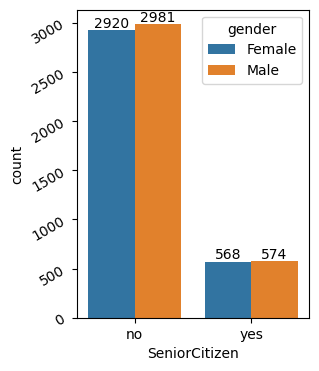

In [9]:
plt.figure(figsize=(3,4))
s = sns.countplot(x = "SeniorCitizen",data=df, hue= "gender")
plt.yticks(rotation = 30)
for x in s.containers:
    s.bar_label(x)
plt.show()

In [82]:
st = df.groupby(["SeniorCitizen"],as_index=False)["TotalCharges"].sum()
st

,SeniorCitizen,TotalCharges
0,no,12843840
1,yes,3209024


# Focus on new customers and senior citizens with personalized offers and support.

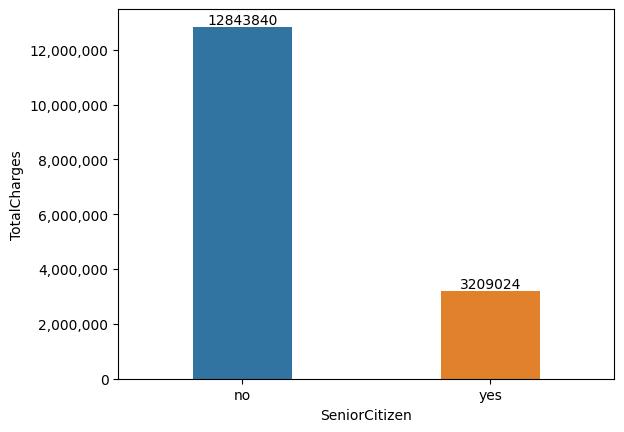

In [88]:
ss = sns.barplot(x = "SeniorCitizen", y="TotalCharges", data=st, hue="SeniorCitizen", width=0.4)
for s in ss.containers:
    ss.bar_label(s,fmt="%.0f")

ss.yaxis.set_major_formatter(mtick.StrMethodFormatter("{x:,.0f}"))

# Count (Monthly, One year, Tow year) contract by gender

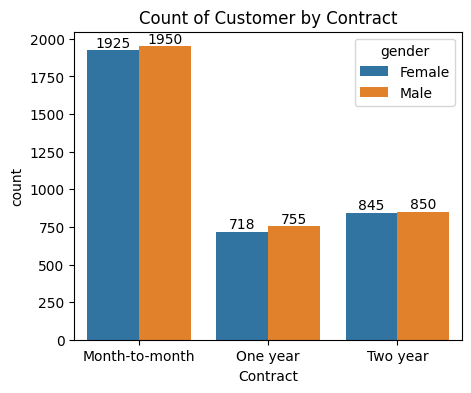

In [10]:
plt.figure(figsize=(5,4))
s = sns.countplot(x = "Contract",data=df, hue='gender')
plt.title("Count of Customer by Contract")
for x in s.containers:
    s.bar_label(x)
plt.show()

# Contract wise Amount

In [97]:
ct = df.groupby(["Contract"], as_index=False)["TotalCharges"].sum().sort_values(by="TotalCharges", ascending=False)
ct = ct.reset_index(drop=True)  # Reset the index and drop the old one
ct


,Contract,TotalCharges
0,Two year,6282466
1,Month-to-month,5304050
2,One year,4466348


# Contract Type: Month-to-month customers have significantly higher churn rates compared to those on yearly or two-year contracts. Encouraging long-term contracts can boost retention.

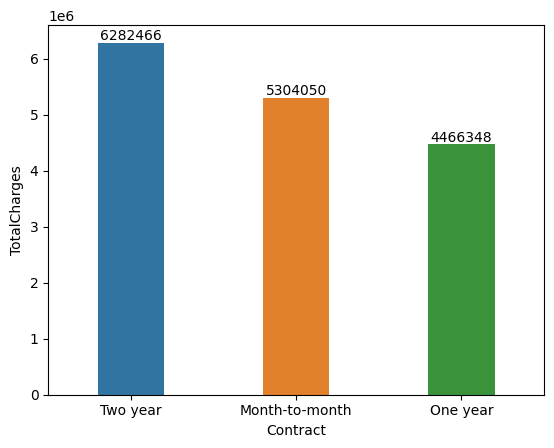

In [96]:
cts = sns.barplot(x = "Contract", y="TotalCharges", data=ct, hue="Contract", width=0.4)
for s in cts.containers:
    cts.bar_label(s,fmt="%.0f")

ss.yaxis.set_major_formatter(mtick.StrMethodFormatter("{x:,.0f}"))

# Count contract on Churn bases

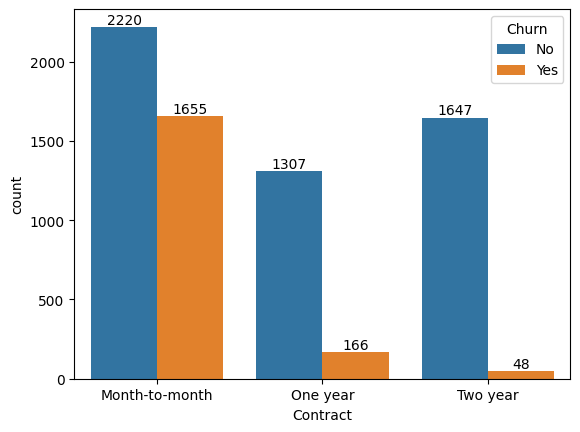

In [155]:
cm = sns.countplot(x = "Contract", data=df, hue="Churn")
for x in cm.containers:
    cm.bar_label(x,fmt="%.0f")

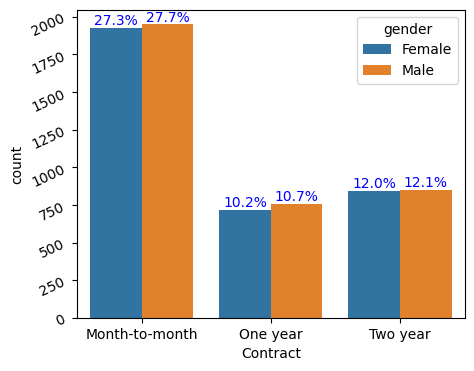

In [11]:

plt.figure(figsize=(5, 4))
s = sns.countplot(x="Contract", data=df, hue="gender")
plt.yticks(rotation = 25)
total_counts = len(df)
for container in s.containers:
    for bar in container:
        percentage = (bar.get_height() / total_counts) * 100
        s.text(
            bar.get_x() + bar.get_width() / 2,  # X-coordinate
            bar.get_height() + 1,              # Y-coordinate (slightly above the bar)
            f'{percentage:.1f}%',              # Format as a percentage
            ha='center',                       # Align horizontally
            va='bottom',                       # Align vertically
            color='blue',                      # Set custom color
            fontsize=10                        # Font size
        )
plt.show()


In [13]:
df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [14]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [15]:
df["MonthlyCharges"].astype(int)

0        29
1        56
2        53
3        42
4        70
       ... 
7038     84
7039    103
7040     29
7041     74
7042    105
Name: MonthlyCharges, Length: 7043, dtype: int32

# Gender wise Monthly Charges

In [16]:
gg = df.groupby(["gender"],as_index=False)["MonthlyCharges"].sum()
gg

,gender,MonthlyCharges
0,Female,227432.4
1,Male,228684.2


In [115]:
print("Monthly Charges",df["MonthlyCharges"].sum())

Monthly Charges 456116.6


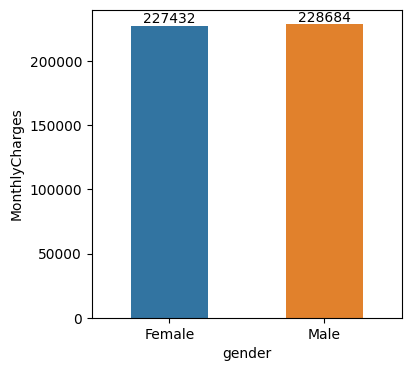

In [17]:
plt.figure(figsize=(4,4))
M = sns.barplot(x = "gender",y = "MonthlyCharges",data=gg, hue ='gender', width=0.5)
for y in M.containers:
    M.bar_label(y)

In [18]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Gender wise Total Charges

In [117]:
df["TotalCharges"] = df["TotalCharges"].replace(' ',0).astype(int)

In [111]:
fm = df.groupby(["gender"],as_index=False)["TotalCharges"].sum()
fm

,gender,TotalCharges
0,Female,7950710
1,Male,8102154


In [118]:
print("Total Charges",df["TotalCharges"].sum())

Total Charges 16052864


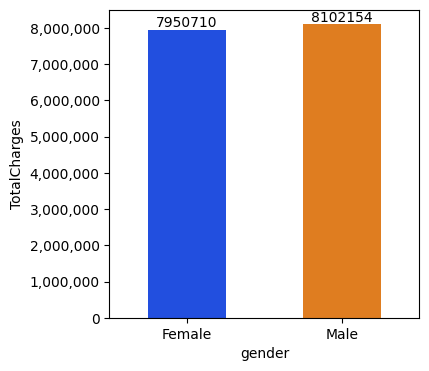

In [119]:
plt.figure(figsize=(4,4))
d = sns.barplot(x = "gender",y =  "TotalCharges", data = fm, hue = "gender" , palette = "bright", width=0.5) 
for x in d.containers:
    d.bar_label(x,fmt='%.0f')

d.yaxis.set_major_formatter(mtick.StrMethodFormatter("{x:,.0f}"))

In [23]:
df['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [24]:
df['MultipleLines'].nunique()

3

In [25]:
df["InternetService"].nunique()

3

In [26]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

# InternetService Type wise Amount

In [98]:
Int = df.groupby(["InternetService"],as_index=False)["TotalCharges"].sum().sort_values(by = "TotalCharges", ascending = False)
Int = Int.reset_index(drop=True)
Int

,InternetService,TotalCharges
0,Fiber optic,9922151
1,DSL,5120291
2,No,1010422


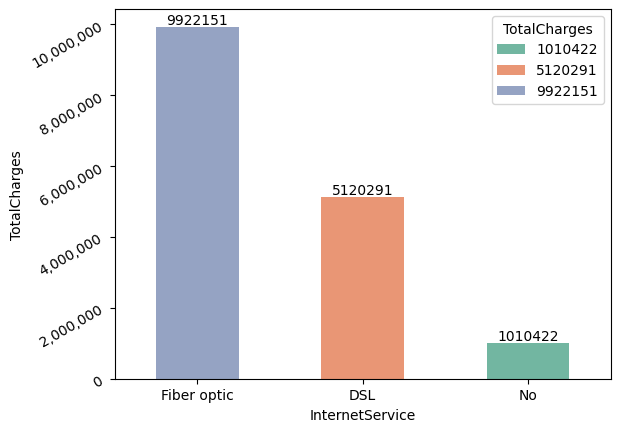

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

I = sns.barplot(
    x="InternetService", 
    y="TotalCharges", 
    data=Int, 
    hue="TotalCharges", 
    palette="Set2",
    width=0.5  # Adjust the width parameter for thinner columns
)
plt.yticks(rotation = 30)

for x in I.containers:
    I.bar_label(x, fmt="%.0f")
    
I.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.show()

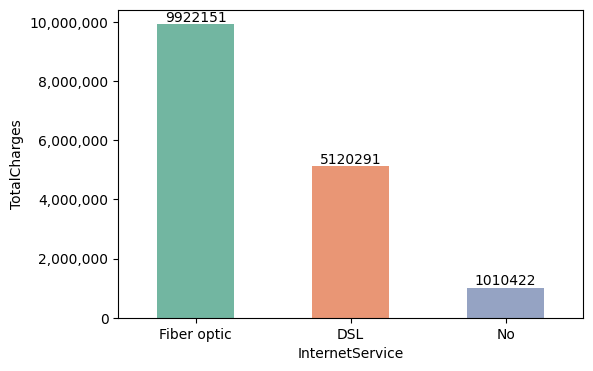

In [101]:
import matplotlib.ticker as mtick

# Create the barplot
plt.figure(figsize=(6, 4))
I = sns.barplot(x="InternetService", y="TotalCharges", data=Int, hue="InternetService", palette="Set2",width=0.5)

# Add labels to the bars with full numbers
for container in I.containers:
    I.bar_label(container, fmt='%.0f')  # Display the full number with no decimals

# Set y-axis formatter to avoid scientific notation
I.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))  # Add commas for readability

# Show the plot
plt.show()


# PaymentMethod Type and Amount

In [30]:
df["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [102]:
Pay = df.groupby(["PaymentMethod"],as_index=False)["TotalCharges"].sum().sort_values(by = "TotalCharges", ascending=False)
Pay = Pay.reset_index(drop=True)
Pay

,PaymentMethod,TotalCharges
0,Electronic check,4943796
1,Bank transfer (automatic),4747544
2,Credit card (automatic),4670878
3,Mailed check,1690646


# Electronic payments (e.g., bank transfers, credit cards) correlate with lower churn, as they offer more convenience compared to mailed checks.

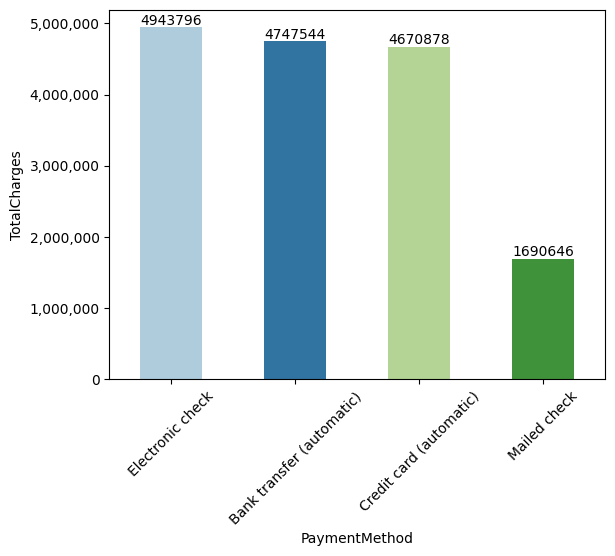

In [103]:
p = sns.barplot(x = "PaymentMethod", y = "TotalCharges", data=Pay, hue="PaymentMethod",palette="Paired", width=0.5)
plt.xticks(rotation = 45)
for s in p.containers:
    p.bar_label(s,fmt="%.0f")

p.yaxis.set_major_formatter(mtick.StrMethodFormatter("{x:,.0f}"))

# Count PaymentMethod by gender

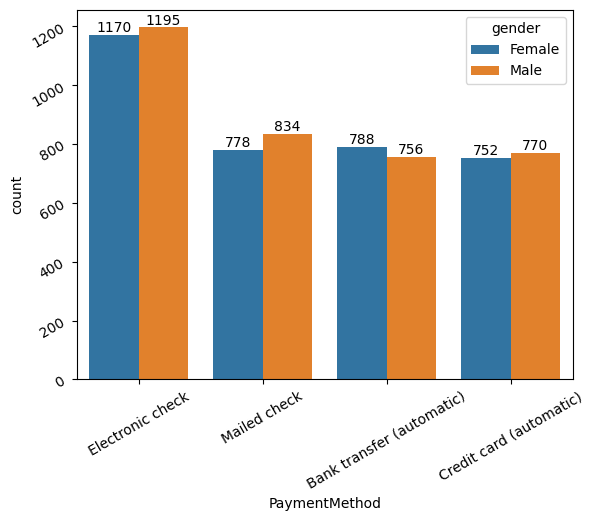

In [33]:
pm = sns.countplot(x = "PaymentMethod", data = df, hue = "gender")
plt.xticks(rotation = 30)
plt.yticks(rotation = 30)
for d in pm.containers:
    pm.bar_label(d)
plt.show()

# Amount generate by partner

In [105]:
PT = df.groupby(["Partner"],as_index=False)["TotalCharges"].sum().sort_values(by = "TotalCharges", ascending = False)
PT = PT.reset_index(drop=True)
PT

,Partner,TotalCharges
0,Yes,10286893
1,No,5765971


# Customers with partners or dependents tend to have lower churn rates, indicating a preference for stability and bundled family plans

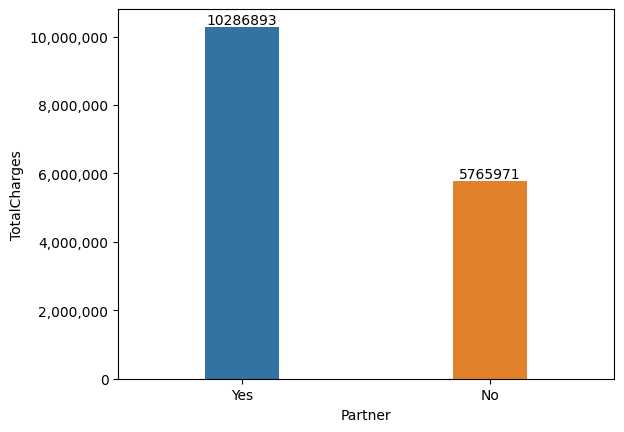

In [35]:
e = sns.barplot(x = "Partner" , y = "TotalCharges", data = PT, hue="Partner", width= 0.3)
for f in e.containers:
    e.bar_label(f, fmt="%.0f")

e.yaxis.set_major_formatter(mtick.StrMethodFormatter("{x:,.0f}"))

# TechSupport by gender

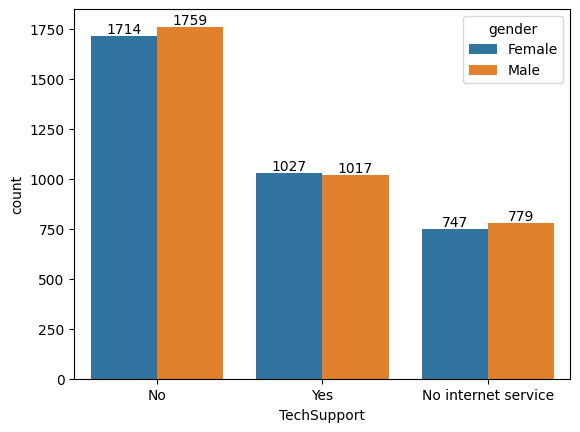

In [36]:
Tec = sns.countplot(x = "TechSupport", data = df, hue = "gender")
for t in Tec.containers:
    Tec.bar_label(t,fmt="%.0f")

# TechSupport type wise MonthlyCharges Amount

In [126]:
tm = df.groupby(["TechSupport"],as_index=False)["MonthlyCharges"].sum().sort_values(by = "MonthlyCharges")
tm = tm.reset_index(drop=True)
tm

,TechSupport,MonthlyCharges
0,No internet service,32166.85
1,Yes,164910.20
2,No,259039.55


In [132]:
print("Total Monthhly Charges", df["MonthlyCharges"].sum())

Total Monthhly Charges 456116.6


# TechSupport type wise TotalCharges Amount

In [129]:
tt = df.groupby(["TechSupport"],as_index=False)["TotalCharges"].sum().sort_values(by = "TotalCharges")
tt = tt.reset_index(drop=True)
tt

,TechSupport,TotalCharges
0,No internet service,1010422
1,No,7254462
2,Yes,7787980


In [133]:
print("Total Charges", df["TotalCharges"].sum())

Total Charges 16052864


# Count Churn by gender

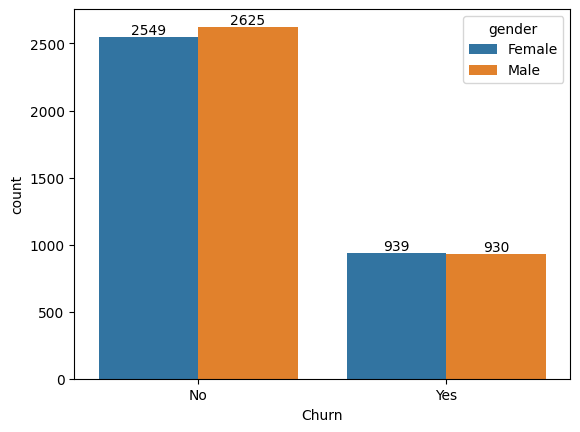

In [37]:
Tec = sns.countplot(x = "Churn", data = df, hue = "gender")
for t in Tec.containers:
    Tec.bar_label(t,fmt="%.0f")

# Churn wise Monthly Charges Amount

In [149]:
cmt = df.groupby(['Churn'],as_index=False)["MonthlyCharges"].sum()
cmt

,Churn,MonthlyCharges
0,No,316985.75
1,Yes,139130.85


# Higher MonthlyCharges often correlate with higher churn rates, suggesting cost sensitivity.

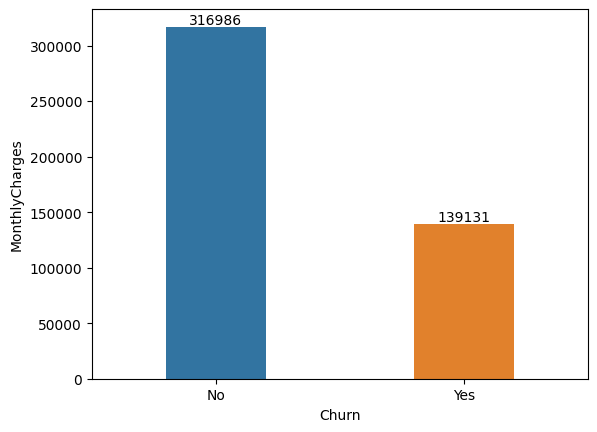

In [151]:
cmc = sns.barplot(x = "Churn", y = "MonthlyCharges", data=cmt, hue="Churn", width=0.4)
for cm in cmc.containers:
    cmc.bar_label(cm,fmt="%.0f")

# Churn wise Total Charges Amount

In [152]:
CT = df.groupby(['Churn'],as_index=False)["TotalCharges"].sum()
CT

,Churn,TotalCharges
0,No,13190821
1,Yes,2862043


# Customers with higher cumulative TotalCharges (indicating loyalty) tend to stay longer.

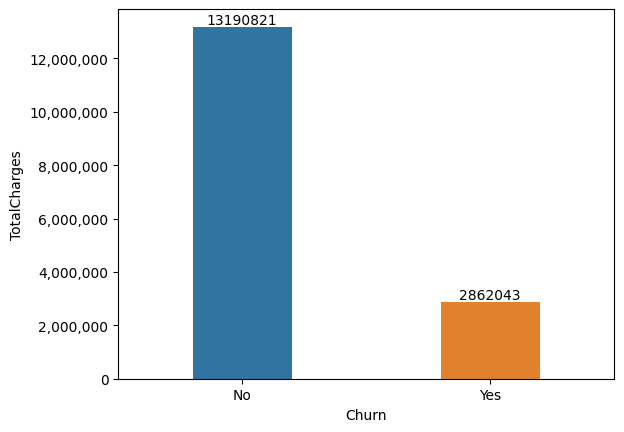

In [154]:
 ctc = sns.barplot(x = "Churn", y = "TotalCharges", data=CT, hue="Churn", width=0.4)
for cm in ctc.containers:
    ctc.bar_label(cm,fmt="%.0f")

ctc.yaxis.set_major_formatter(mtick.StrMethodFormatter("{x:,.0f}"))

# Tenure by gender

In [41]:
gt = df.groupby(['gender'],as_index=False)['tenure'].sum()
gt


,gender,tenure
0,Female,112469
1,Male,115521


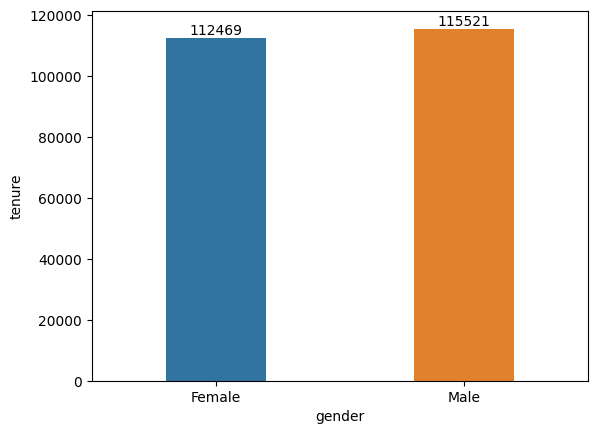

In [42]:
gten = sns.barplot(x="gender", y="tenure",data=gt,hue="gender",width=0.4)
for g in gten.containers:
    gten.bar_label(g,fmt="%.0f")

# Tenure wise total charges

In [43]:
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

In [44]:
df["tenure"].count()

7043

In [45]:
u = df.groupby(['tenure'],as_index=False)['TotalCharges'].sum().sort_values(by = "TotalCharges",ascending = False).sum()
u

tenure              2628
TotalCharges    16052864
dtype: int64

In [106]:
u = df.groupby(['tenure'],as_index=False)['TotalCharges'].sum().sort_values(by = "TotalCharges",ascending = False).head(15)
u = u.reset_index(drop=True)
u

,tenure,TotalCharges
0,72,2103935
1,71,890480
2,70,636482
3,68,500578
4,67,474302
5,69,463179
6,66,447587
7,65,396649
8,64,388500
9,61,346012


In [107]:
df["tenure"].count()

7043

In [165]:
df["tenure"].value_counts()

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

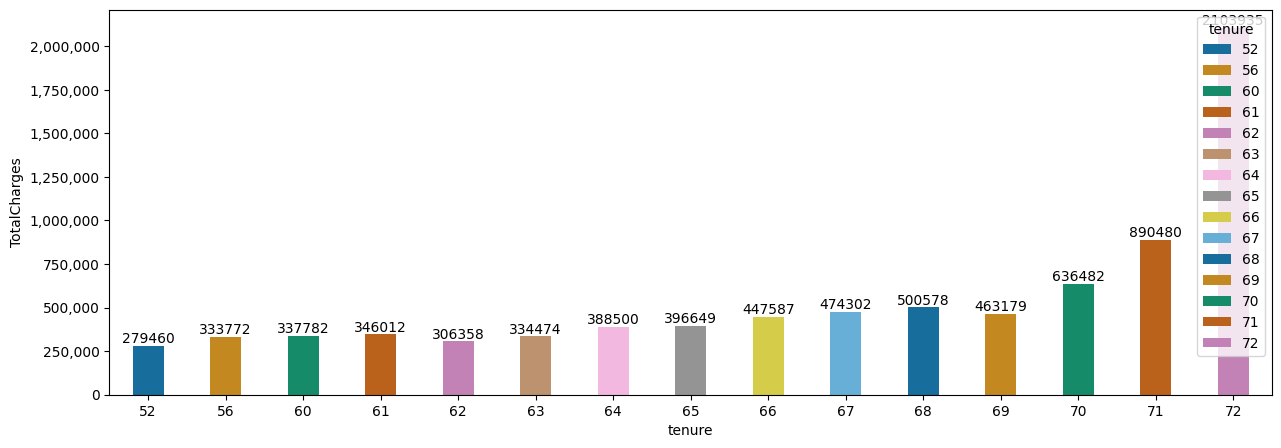

In [108]:
plt.figure(figsize=(15,5))
tt = sns.barplot(x = "tenure", y = "TotalCharges", data=u, palette="colorblind",width=0.4, hue= "tenure")
tt 
for ts in tt.containers:
    tt.bar_label(ts,fmt="%.0f")

tt.yaxis.set_major_formatter(mtick.StrMethodFormatter("{x:,.0f}"))


In [79]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151,Yes


# Count gender wise Phone Service 

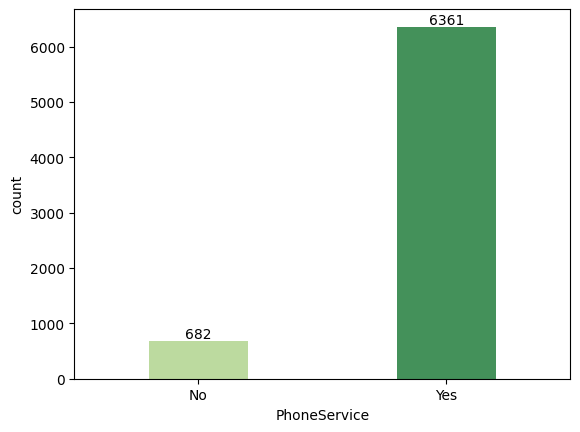

In [59]:
ph = sns.countplot(x = "PhoneService", data=df,hue = "PhoneService", palette = "YlGn", width = 0.4 )
for p in ph.containers:
    ph.bar_label(p)

# PhoneServices wise Amount

In [109]:
ptt = df.groupby(["PhoneService"],as_index=False)["TotalCharges"].sum().sort_values(by = "TotalCharges", ascending = False)
ptt = ptt.reset_index(drop=True)
ptt

,PhoneService,TotalCharges
0,Yes,15032885
1,No,1019979


C:\Users\computer\AppData\Local\Temp\ipykernel_10076\3916730402.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ptp = sns.barplot(x ="PhoneService" , y="TotalCharges", data=ptt, hue = "PhoneService", ci = None, width=0.4)


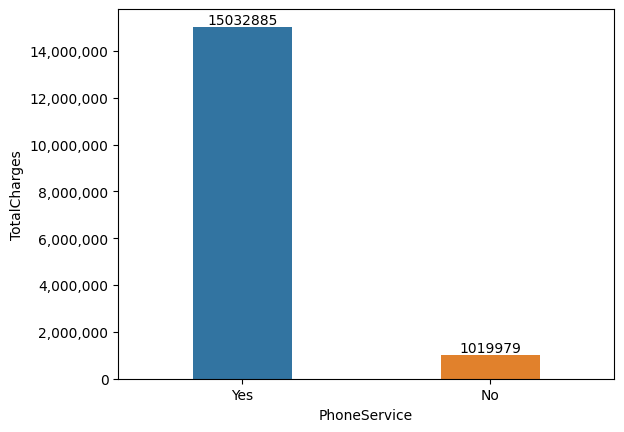

In [74]:
ptp = sns.barplot(x ="PhoneService" , y="TotalCharges", data=ptt, hue = "PhoneService", ci = None, width=0.4)
ptp
for p in ptp.containers:
    ptp.bar_label(p, fmt="%.0f")

ptp.yaxis.set_major_formatter(mtick.StrMethodFormatter("{x:,.0f}"))

In [50]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

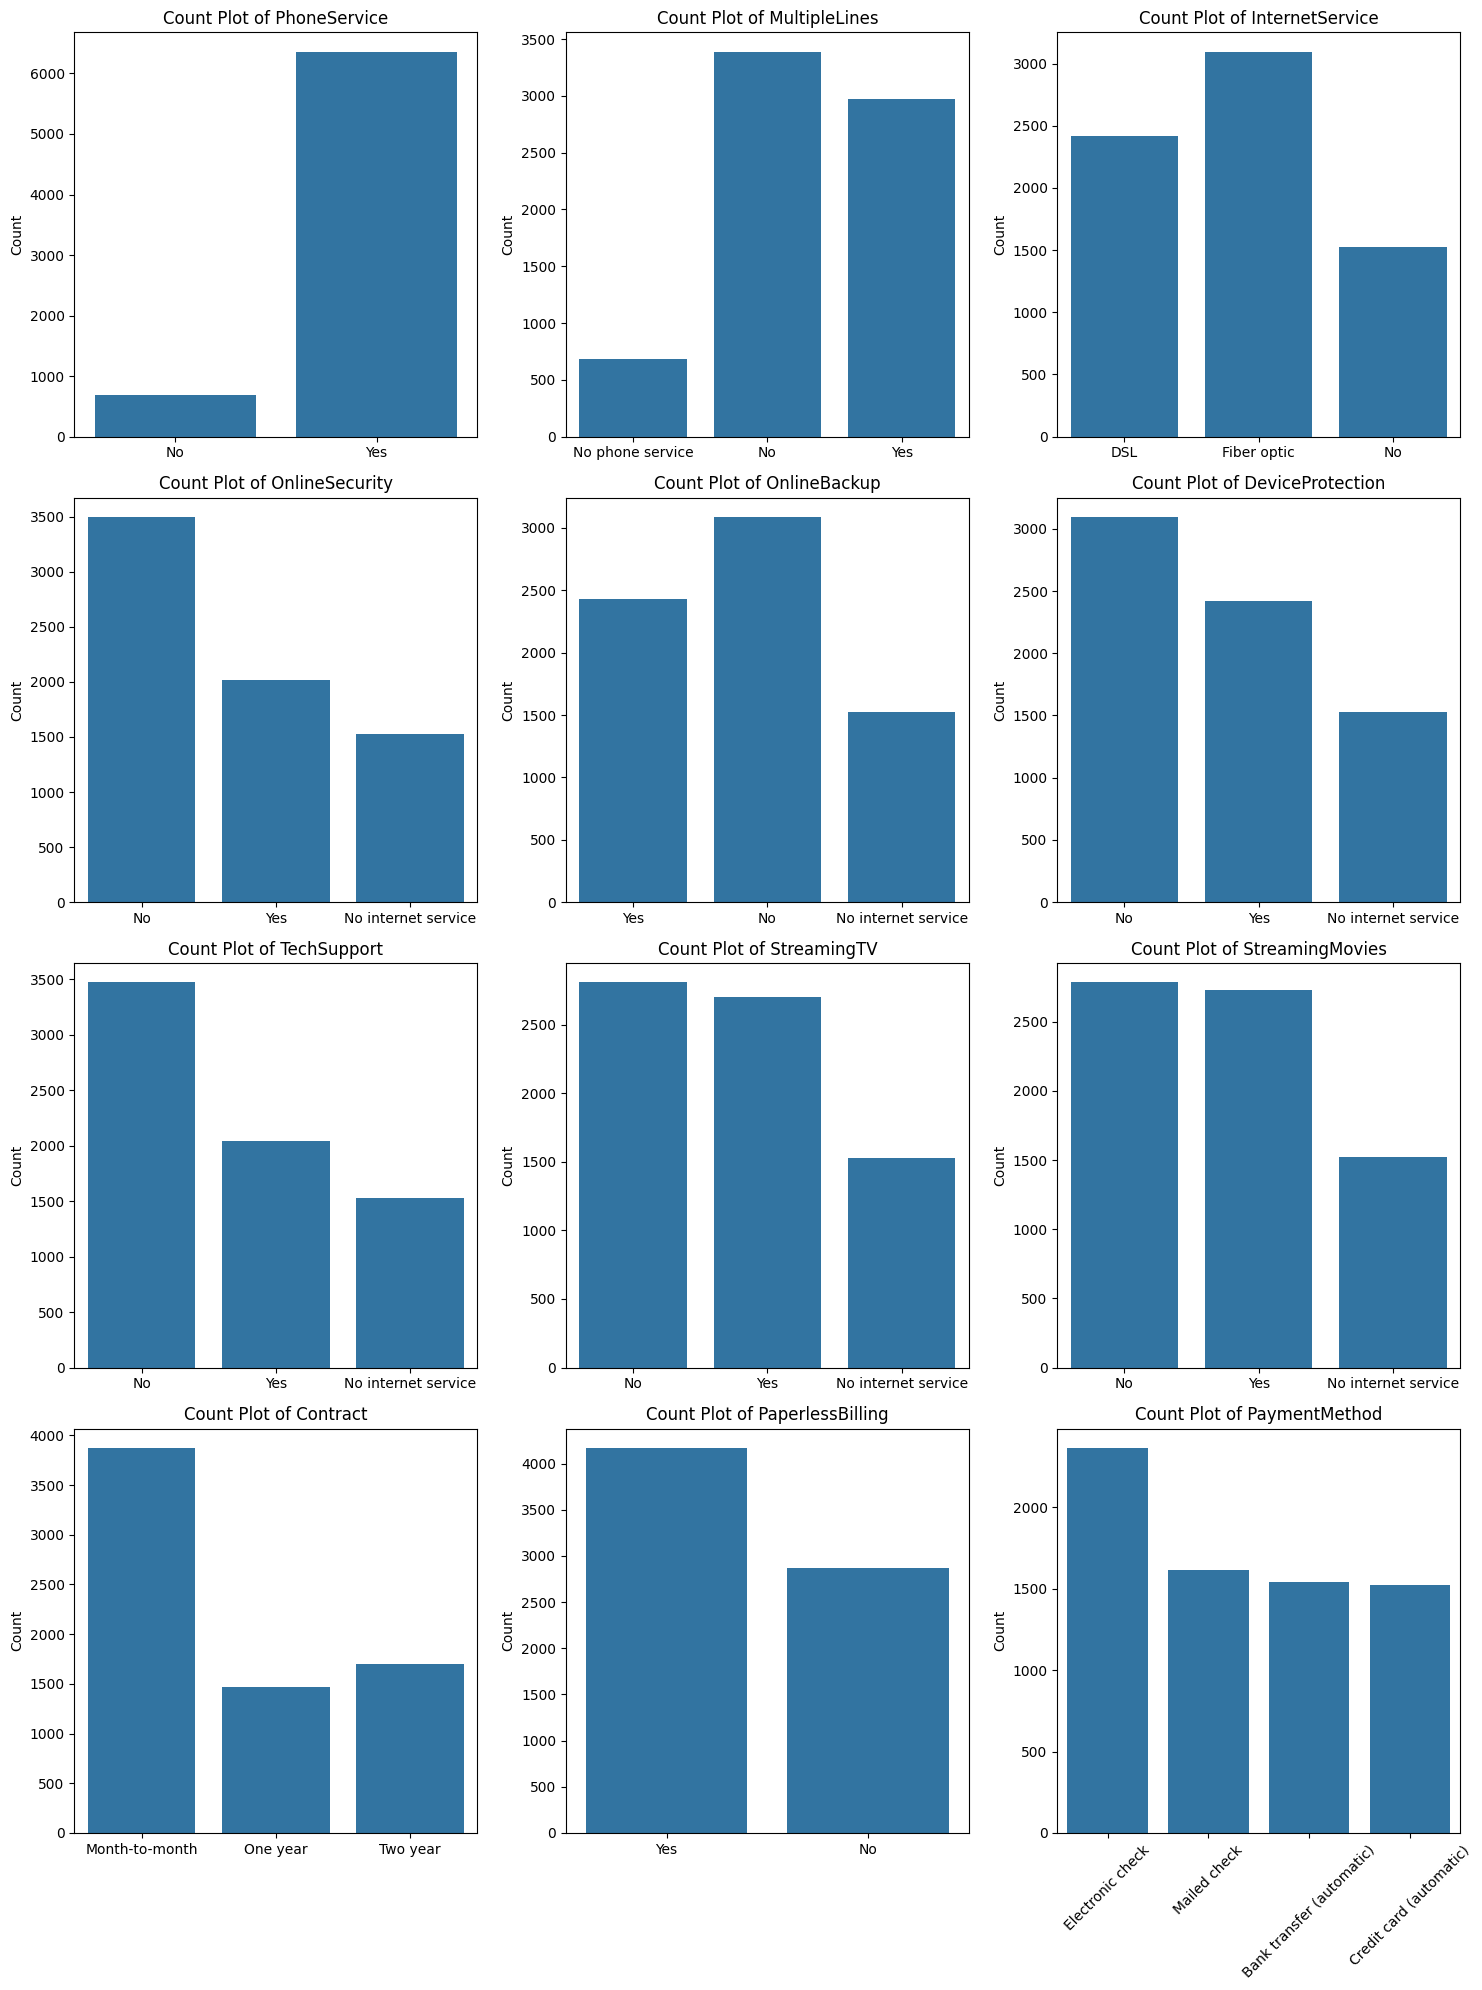

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
  # Update this to your file path
data = pd.read_csv(r"D:\Analyst File\Data set\Telco communication churn\WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Columns to analyze
columns_to_plot = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 
    'Contract', 'PaperlessBilling','PaymentMethod'
]

# Set up the subplot grid
num_columns = len(columns_to_plot)
rows = (num_columns // 3) + (1 if num_columns % 3 != 0 else 0)  # Calculate rows for 3 columns per row

fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Generate count plots
for i, col in enumerate(columns_to_plot):
    sns.countplot(data=data, x=col, ax=axes[i])
    axes[i].set_title(f"Count Plot of {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")

# Hide any unused subplots
for i in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[i])

plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()
